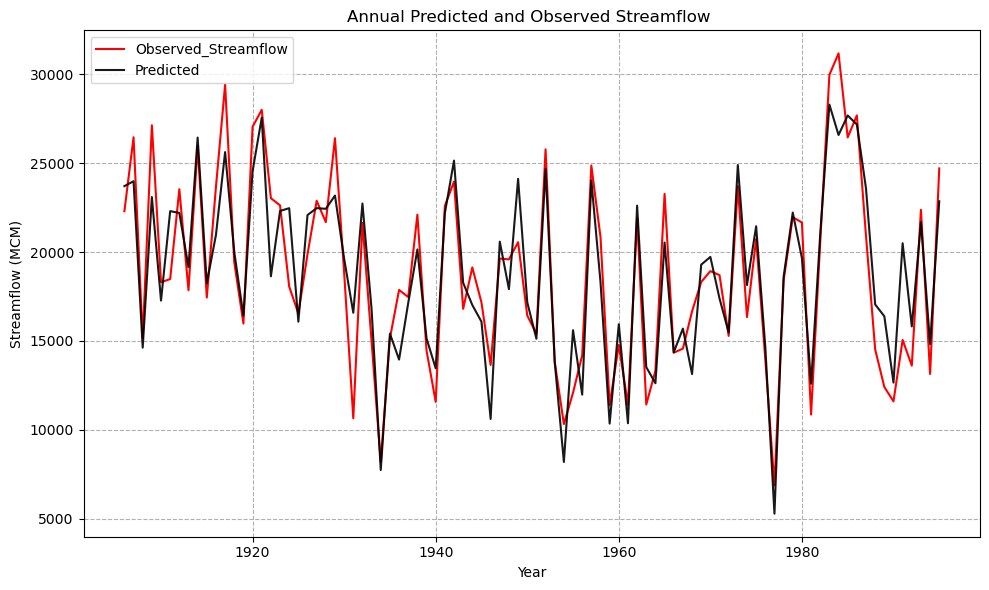

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# -----------------------------
# 1) Load the Excel file
# -----------------------------
file_path = "observed_vs_predicted_new.xlsx"   
df = pd.read_excel(file_path)

# -----------------------------
# 2) First column is 'Year'
# -----------------------------
year_col = df.columns[0]
df[year_col] = pd.to_numeric(df[year_col], errors='coerce')  
df = df.dropna(subset=[year_col])

years = df[year_col]

# -----------------------------
# 3) Plot each remaining column vs Year
# -----------------------------
plt.figure(figsize=(10, 6))

plt.plot(years, df.iloc[:, 1], label=df.columns[1], color="red")

for col in df.columns[2:3]:
    plt.plot(years, df[col], label='Predicted', alpha=0.9, color = "#000000")

plt.xlabel("Year")
plt.ylabel("Streamflow (MCM)")
plt.title("Annual Predicted and Observed Streamflow ")
plt.grid(True, linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

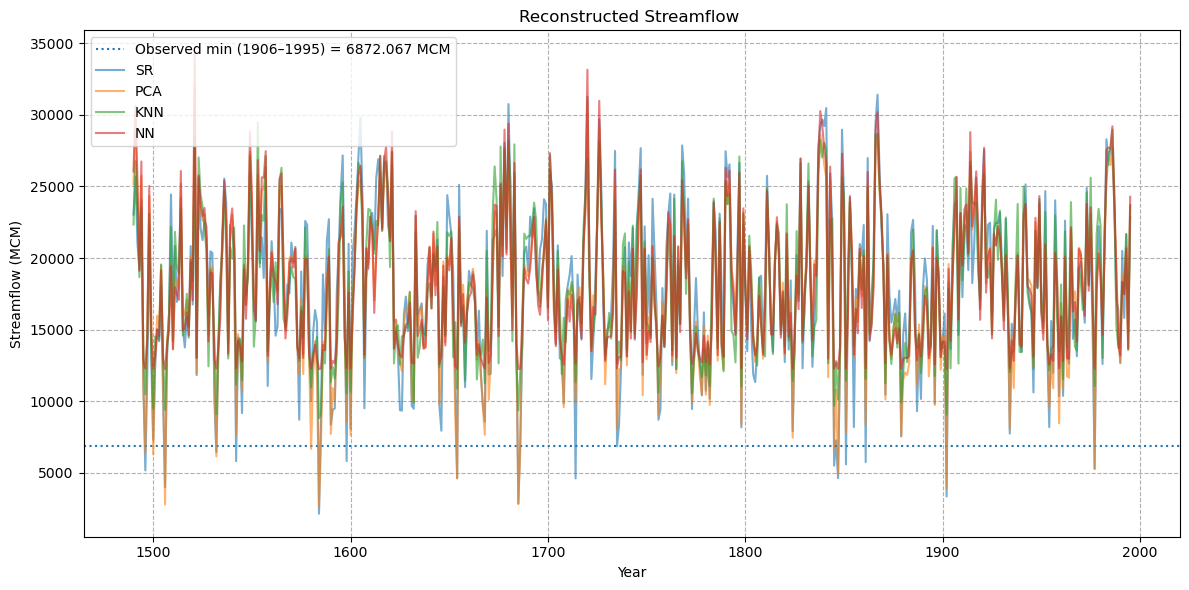

In [31]:
file_path = "Reconstruction New.xlsx"   
df = pd.read_excel(file_path)

# -----------------------------
# 2) First column is 'Year'
# -----------------------------
year_col = df.columns[0]
df[year_col] = pd.to_numeric(df[year_col], errors='coerce')  
df = df.dropna(subset=[year_col])

years = df[year_col]

# -----------------------------
# 3) Plot each remaining column vs Year
# -----------------------------
plt.figure(figsize=(12, 6))
plt.axhline(6872.067, linestyle=":", linewidth=1.5,label=f"Observed min (1906–1995) = {6872.067} MCM")


for col in df.columns[1:6]:
    plt.plot(years, df[col], label=col, alpha=0.6)

plt.xlabel("Year")
plt.ylabel("Streamflow (MCM)")
plt.title("Reconstructed Streamflow ")
plt.grid(True, linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

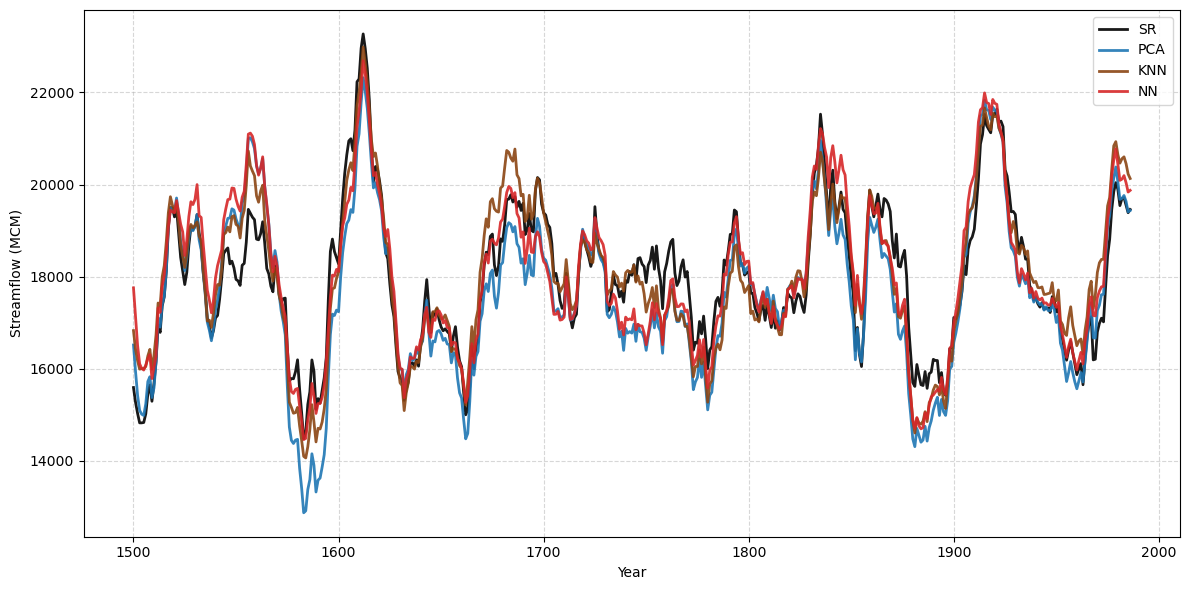

In [33]:
# -----------------------------
# 4) Compute 20-year running averages
# -----------------------------
df_smooth = df.copy()
for col in df.columns[1:6]:
    df_smooth[col] = df[col].rolling(window=20, center=True).mean()

# -----------------------------
# 4) Plot smoothed series with custom colors
# -----------------------------
colors = [
    "#000000",  # black
    "#1F77B4",  # ash gray
    "#8B4513",  # brown
    "#D62728",  # red
    "#FFA600"   # orange
]

plt.figure(figsize=(12, 6))

for idx, col in enumerate(df_smooth.columns[1:6]):
    plt.plot(
        years,
        df_smooth[col],
        label=col,
        linewidth=2.0,
        alpha=0.9,
        color=colors[idx]
    )

plt.xlabel("Year")
plt.ylabel("Streamflow (MCM)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


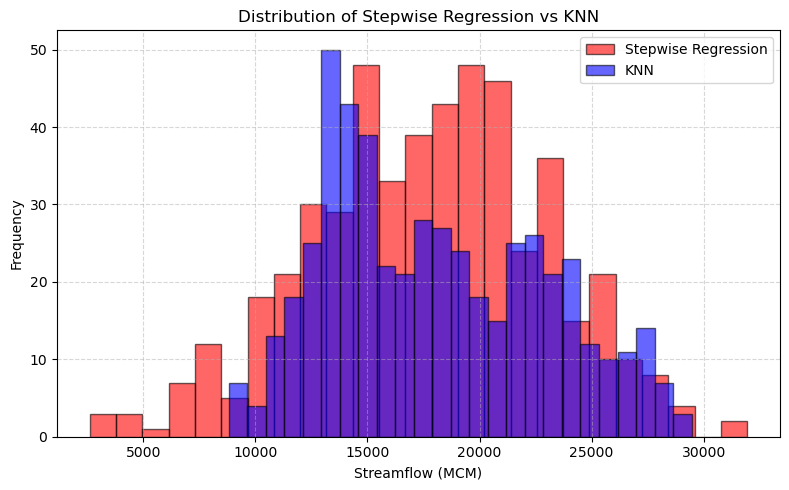

In [34]:
file_path = "Reconstruction New.xlsx"
df = pd.read_excel(file_path)

# Assume first column is 'Year'
year_col = df.columns[0]

# Select the two columns you want to compare (2nd and 3rd columns)
col1 = df.columns[2]
col2 = df.columns[3]

# Drop missing values just in case
data1 = df[col1].dropna()
data2 = df[col2].dropna()

# -----------------------------
# Plot histograms together
# -----------------------------
plt.figure(figsize=(8, 5))
plt.hist(data1, bins=25, alpha=0.6, label='Stepwise Regression', color='red', edgecolor='black')
plt.hist(data2, bins=25, alpha=0.6, label=col2, color='blue', edgecolor='black')

plt.xlabel("Streamflow (MCM)")
plt.ylabel("Frequency")
plt.title(f"Distribution of Stepwise Regression vs KNN")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [36]:
# -----------------------------
# 1) Load Excel
# -----------------------------
file_path = "observed_vs_predicted_new.xlsx"
df = pd.read_excel(file_path)

# -----------------------------
# 2) Extract Year + Observed
# -----------------------------
year_col = df.columns[0]
obs_col   = df.columns[1]      

df[year_col] = pd.to_numeric(df[year_col], errors='coerce')
df = df.dropna(subset=[year_col])

years = df[year_col]
observed = df[obs_col].astype(float)

# -----------------------------
# 3) Compute R² for each predicted column
# -----------------------------
print("\n=== R² Scores ===")
r2_results = {}

for col in df.columns[2:7]:    # all predicted columns
    pred = df[col].astype(float)
    
    r2 = r2_score(observed, pred)
    r2_results[col] = r2
    
    print(f"{col}: R² = {r2:.4f}")





=== R² Scores ===
SR: R² = 0.8401
PCA: R² = 0.7701
KNN: R² = 0.7799
NN: R² = 0.7835


In [38]:
file_path = "observed_vs_Predicted_new.xlsx"
df = pd.read_excel(file_path)

# Exclude the first column (Year)
data_cols = df.columns[1:]     # all columns except Year

# Convert selected columns to numeric
df[data_cols] = df[data_cols].apply(pd.to_numeric, errors='coerce')

# Compute mean and std
col_means = df[data_cols].mean()
col_stds  = df[data_cols].std()

print("\n=== Column Means (excluding Year) ===")
print(col_means)

print("\n=== Column Standard Deviations (excluding Year) ===")
print(col_stds)



=== Column Means (excluding Year) ===
Observed_Streamflow    18777.513864
SR                     18777.513864
PCA                    18777.513864
KNN                    19203.109466
NN                     19013.411719
dtype: float64

=== Column Standard Deviations (excluding Year) ===
Observed_Streamflow    5332.009104
SR                     4887.061978
PCA                    4678.994186
KNN                    4640.832605
NN                     4472.988705
dtype: float64


In [39]:
file_path = "Reconstruction New.xlsx"
df = pd.read_excel(file_path)

# Exclude the first column (Year)
data_cols = df.columns[1:]     # all columns except Year

# Convert selected columns to numeric
df[data_cols] = df[data_cols].apply(pd.to_numeric, errors='coerce')

# Compute mean and std
col_means = df[data_cols].mean()
col_stds  = df[data_cols].std()

print("\n=== Column Means (excluding Year) ===")
print(col_means)

print("\n=== Column Standard Deviations (excluding Year) ===")
print(col_stds)


=== Column Means (excluding Year) ===
SR     17992.177948
PCA    17679.782180
KNN    18044.117951
NN     18079.566454
dtype: float64

=== Column Standard Deviations (excluding Year) ===
SR     5628.280155
PCA    5198.382109
KNN    4852.095820
NN     4756.395696
dtype: float64
